<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/MLSST_MCD_lenet_64_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import shutil
import subprocess
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!nvidia-smi

Wed Aug 24 17:50:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    22W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [5]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 550 (delta 11), reused 0 (delta 0), pack-reused 531
Receiving objects: 100% (550/550), 1.03 MiB | 3.54 MiB/s, done.
Resolving deltas: 100% (392/392), done.


In [6]:
!cd bnn_hmc && git checkout dropout_wip

Branch 'dropout_wip' set up to track remote branch 'dropout_wip' from 'origin'.
Switched to a new branch 'dropout_wip'


In [7]:
# https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl (189.4 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
for i, root in enumerate(glob.glob('/content/runs/*/')):
  shutil.rmtree(root, ignore_errors=True)

In [19]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/mlsst/ \
--dataset_name=mlsst/Y10 --model_name=lenet_dropout --init_step_size=3e-7 --num_epochs=200 --eval_freq=5 \
--batch_size=100 --save_freq=5 --optimizer=SGD --patience 20 --test_split validation \
--dropout_rate 0.1 --image_size=64 --scaling asinh --subset_train_to=20000

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
2022-08-24 17:56:34.905987: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1154433024 exceeds 10% of free system memory.
tcmalloc: large alloc 1154433024 bytes == 0x1d416000 @  0x7f0561dc8b6b 0x7f0561de8379 0x7f051475ffc7 0x7f0502b9666f 0x7f0502c33d78 0x7f050e34d1d0 0x7f050e34d763 0x7f050f8f31c2 0x7f0502d5826b 0x7f050f9c75c1 0x7f05087b1551 0x7f05087ae213 0x7f0503492515 0x7f05617aa6db 0x7f0561ae361f
Starting from random initialization with provided seed
/content/bnn_hmc/bnn_hmc/utils/script_utils.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_sta

In [20]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/mlsst/ \
--dataset_name=mlsst/Y10 --model_name=lenet_dropout --init_step_size=3e-7 --num_epochs=200 --eval_freq=5 \
--batch_size=100 --save_freq=5 --optimizer=SGD --patience 10 --eval_split test \
--dropout_rate 0.1 --image_size=64 --scaling asinh --repeats 10

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
2022-08-24 18:02:46.462841: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1154433024 exceeds 10% of free system memory.
tcmalloc: large alloc 1154433024 bytes == 0x1beb6000 @  0x7fe44799bb6b 0x7fe4479bb379 0x7fe3fa332fc7 0x7fe3e876966f 0x7fe3e8806d78 0x7fe3f3f201d0 0x7fe3f3f20763 0x7fe3f54c61c2 0x7fe3e892b26b 0x7fe3f559a5c1 0x7fe3ee384551 0x7fe3ee381213 0x7fe3e9065515 0x7fe44737d6db 0x7fe4476b661f
Continuing the run from the last saved checkpoint
bnn_hmc/scripts/run_sgd.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_state, test_set, key))
{'acc

In [21]:
softmax = []
for i, root in enumerate(glob.glob('/content/runs/sgd/mlsst/*/predictions*npy')):
  data = np.load(root.replace('predictions', 'test_set')) 
  prediction = np.load(root)
  metrics = np.load(root.replace('predictions', 'metrics'), allow_pickle=True)
  print(metrics)
  softmax.append(np.squeeze(prediction))
softmax = np.array(softmax)

{'accuracy': array(0.63544303, dtype=float32), 'nll': 0.9673609, 'ece': array(0.12593244, dtype=float32)}
{'accuracy': array(0.6405063, dtype=float32), 'nll': 0.94891155, 'ece': array(0.12537982, dtype=float32)}
{'accuracy': array(0.637379, dtype=float32), 'nll': 0.96582425, 'ece': array(0.12404026, dtype=float32)}
{'accuracy': array(0.6455696, dtype=float32), 'nll': 0.94587576, 'ece': array(0.11323478, dtype=float32)}
{'accuracy': array(0.64139986, dtype=float32), 'nll': 0.94426686, 'ece': array(0.1172181, dtype=float32)}
{'accuracy': array(0.6388682, dtype=float32), 'nll': 0.9698109, 'ece': array(0.12337077, dtype=float32)}
{'accuracy': array(0.6357409, dtype=float32), 'nll': 0.9646271, 'ece': array(0.1281301, dtype=float32)}
{'accuracy': array(0.64035743, dtype=float32), 'nll': 0.9469337, 'ece': array(0.12167293, dtype=float32)}
{'accuracy': array(0.6349963, dtype=float32), 'nll': 0.9653466, 'ece': array(0.12712434, dtype=float32)}
{'accuracy': array(0.6367833, dtype=float32), 'nll'

In [22]:
mean_softmax = np.mean(softmax, axis=0)
ensemble_accuracy = np.mean(np.argmax(mean_softmax, axis=-1) == data)
print('Ensemble accuracy', ensemble_accuracy)

Ensemble accuracy 0.6820551005212211


In [23]:
def uncertainty(softmax):
  # Per example softmax with shape(num_examples, num_classes)
  predictive_entropy = 0
  single_pass_entropy = 0
  for i in range(softmax.shape[1]):
    # Sum over classes
    predictive_entropy += -np.mean(softmax[:,i])*np.log(np.mean(softmax[:,i]))
    single_pass_entropy += -softmax[:,i]*np.log(softmax[:,i])
  single_pass_entropy = np.mean(single_pass_entropy)
  mutual_info = predictive_entropy - single_pass_entropy
  return predictive_entropy, single_pass_entropy, mutual_info

In [24]:
predictive_entropies = [] 
single_pass_entropies = []
mutual_infos = []
for i in range(softmax.shape[1]):
  predictive_entropy, single_pass_entropy, mutual_info = uncertainty(softmax[:,i,:])
  predictive_entropies.append(predictive_entropy)
  single_pass_entropies.append(single_pass_entropy)
  mutual_infos.append(mutual_info)
print('Predictive entropy:', np.mean(predictive_entropies), np.std(predictive_entropies))
print('Single pass entropy:', np.mean(single_pass_entropies), np.std(single_pass_entropies))
print('Mutual info:', np.mean(mutual_infos), np.std(mutual_infos))

Predictive entropy: 0.6728934176087049 0.3261580638619812
Single pass entropy: 0.55011487 0.29535943
Mutual info: 0.12277855433855503 0.08790546940997121


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


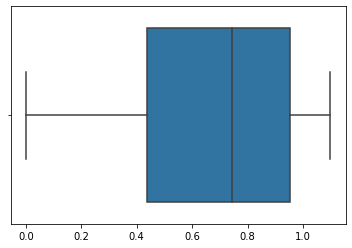

In [25]:
sns.boxplot(predictive_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


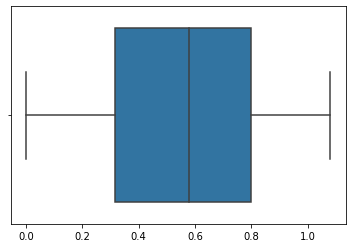

In [26]:
sns.boxplot(single_pass_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


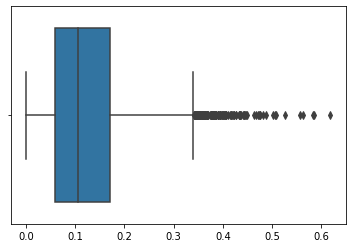

In [27]:
sns.boxplot(mutual_infos)
plt.show()